In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
# Visualize Tractor Sales data as time series
from io import StringIO
import requests
import os


In [2]:
sales_data = pd.read_csv('PH-Sales.csv')  
sales_data.head(5)


,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [4]:
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [9]:
import calendar
sales_data['Month'] = dates.month
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5


In [10]:
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,Jan
1,Feb-03,157,Feb
2,Mar-03,185,Mar
3,Apr-03,199,Apr
4,May-03,203,May


In [11]:
sales_data['Year'] = dates.year
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [12]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.head(5)

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [13]:
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data.head(5)

,Tractor-Sales,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [ ]:
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]
sales_data.head(5)

### since the complete date was not mentioned in the column, we assume that it was the first of every month

In [14]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [15]:
# set the dates as the index of the dataframe, so that it can be treated as a 
# time-series dataframe
sales_data.set_index(dates, inplace=True)
sales_data.head(5)

,Tractor-Sales,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


Text(0, 0.5, 'Tractor Sales')

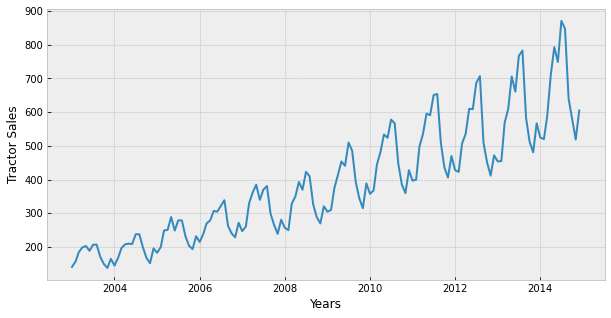

In [16]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

###   PH Trend - Time Series Decompositionremove wrinkles from our time series using moving average. moving   average of different time periods i.e. 4,6,8, and 12 months 

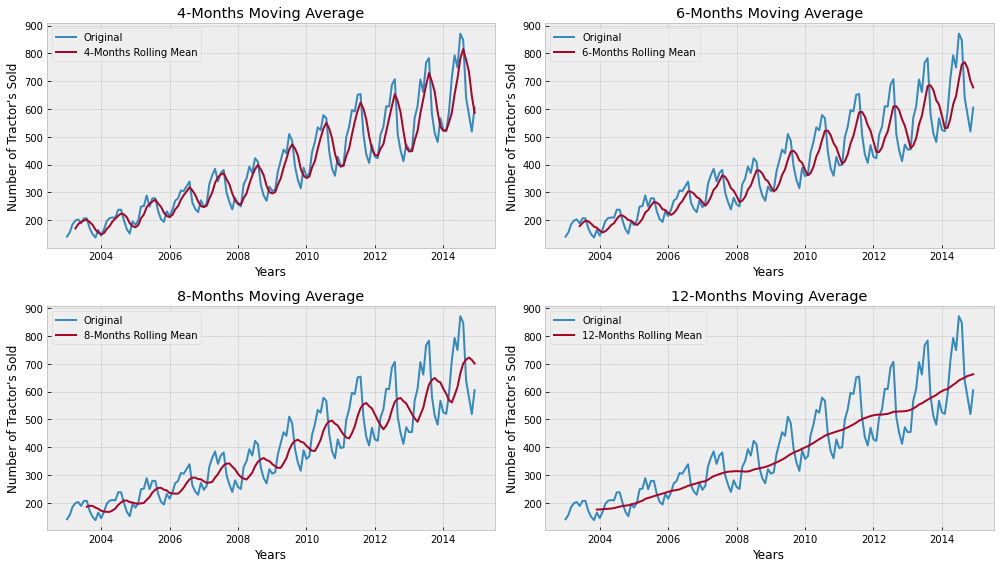

'# 12-month moving average produces a wrinkle free curve. \n# There is expected monthly-seasonal effect in our data.'

In [17]:
# PH Trend - Time Series Decomposition
# remove wrinkles from our time series using moving average. 
# moving average of different time periods i.e. 4,6,8, and 12 months 

fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()
'''# 12-month moving average produces a wrinkle free curve. 
# There is expected monthly-seasonal effect in our data.'''


In [18]:
# plot the rolling mean and standard deviation on window of 12 months.
# Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()


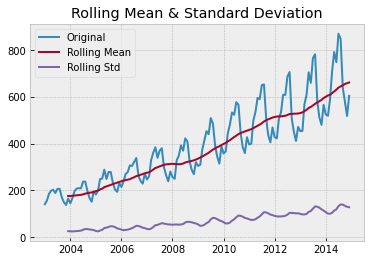

In [19]:
#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [20]:
# PH Tractor - Dicky Fuller Test on the timeseries 
# run the Dicky Fuller Test on the timeseries and 
# verify the null hypothesis that the TS is non-stationary.
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
'''# Though the variation in standard deviation is small, 
# rolling mean is clearly increasing with time and 
# this is not a stationary series. 
# we observe the moving average over months that there is a monhly pattern,
'''


Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


'# Though the variation in standard deviation is small, \n# rolling mean is clearly increasing with time and \n# this is not a stationary series. \n# we observe the moving average over months that there is a monhly pattern,\n'

In [21]:
# PH Tractor Seasonality – Time Series Decomposition
# The first thing to do is to see how number of tractors sold vary on a 
# month on month basis. plot a stacked annual plot to observe seasonality
sales_data.head()

,Tractor-Sales,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [22]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data


Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [23]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data


Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='Month'>

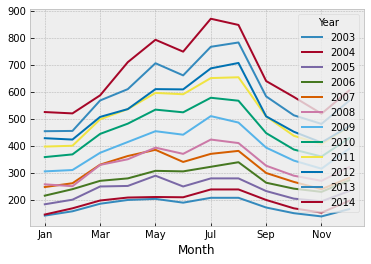

In [24]:
monthly_sales_data.plot()

In [25]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data


Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:>

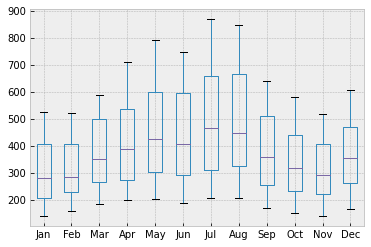

In [26]:
yearly_sales_data.boxplot()

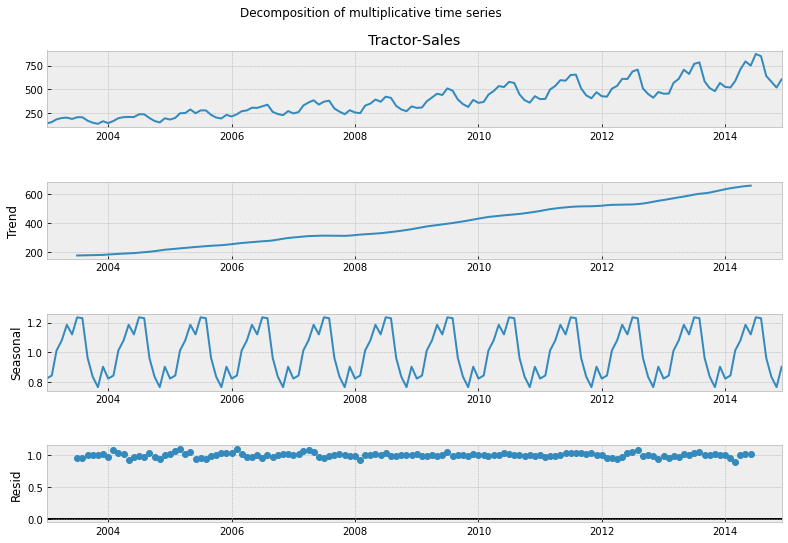

In [27]:
'''# Important Inferences
# The tractor sales have been increasing without fail every year.
# July and August are the peak months for tractor sales and the variance and 
# the mean value in July and August are also much higher than any of the 
# other months.
# We can see a seasonal cycle of 12 months where the mean value of each month 
# starts with a increasing trend in the beginning of the year and drops down 
# towards the end of the year. We can see a seasonal effect with a cycle of 
# 12 months.'''




# PH Tractor Irregular Remainder
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()


In [29]:
# PH Arima Modeling
# convert to a dataframe for easy plot and differenciation
random_df = pd.read_csv('dummy-sales.csv')
random_df.head(5)

,Month,Sales
0,1,266.0
1,2,145.9
2,3,183.1
3,4,119.3
4,5,180.3


In [30]:
random_df.set_index(pd.date_range(start='2012-01-01', freq='MS', periods=len(random_df)), inplace=True)
random_df.head(5)

,Month,Sales
2012-01-01,1,266.0
2012-02-01,2,145.9
2012-03-01,3,183.1
2012-04-01,4,119.3
2012-05-01,5,180.3


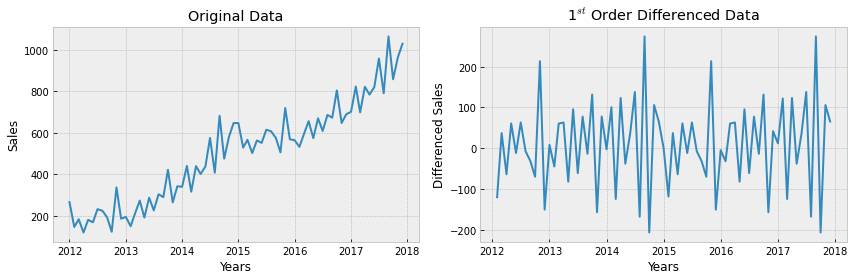

In [31]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(random_df.index, random_df['Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")
axes[1].plot(random_df.index, random_df['Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

In [32]:
'''
# The residual data of most time series usually become trend-less after 
# the first order differencing which is represented as ARIMA(0,1,0). 
# Notice, AR (p), and MA (q) values in this notation are 0 and 
# the integrated (I) value has order one. If the residual series still has a 
# trend it is further differenced and is called 2nd order differencing. 
# This trend-less series is called stationary on mean series 
# i.e. mean or average value for series does not change over time.'''


'\n# The residual data of most time series usually become trend-less after \n# the first order differencing which is represented as ARIMA(0,1,0). \n# Notice, AR (p), and MA (q) values in this notation are 0 and \n# the integrated (I) value has order one. If the residual series still has a \n# trend it is further differenced and is called 2nd order differencing. \n# This trend-less series is called stationary on mean series \n# i.e. mean or average value for series does not change over time.'

In [ ]:
#***


# 2nd Pass of ARIMA to Extract Juice / Information


# White Noise & Arim
# generate white noise
np.random.seed(1)
# plot of discrete white noise
plt.figure(figsize=(10, 5))
white_noise = np.random.normal(size=1000)
plt.plot(white_noise)
plt.xlabel('Data')
plt.ylabel('Time Index')
plt.show()
'''
'''


# ACF Plot
plt.figure()
smt.graphics.plot_acf(white_noise, lags=30, alpha=0.5)
plt.show()


#***



Text(0, 0.5, 'Tractor Sales')

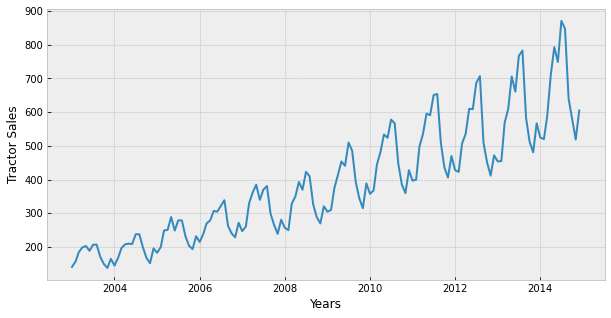

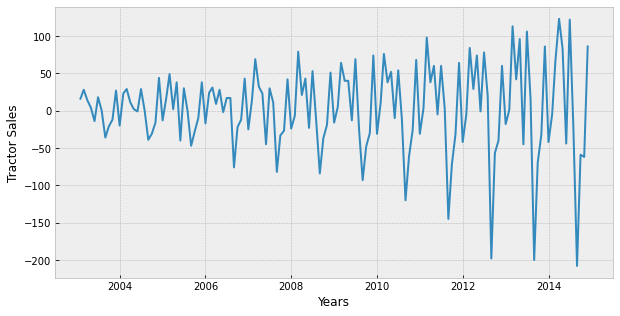

In [33]:
# Step 2: Difference data to make data stationary on mean (remove trend)

sales_ts.head()

# original
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')


plt.figure(figsize=(10, 5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')



Text(0, 0.5, 'Log (Tractor Sales)')

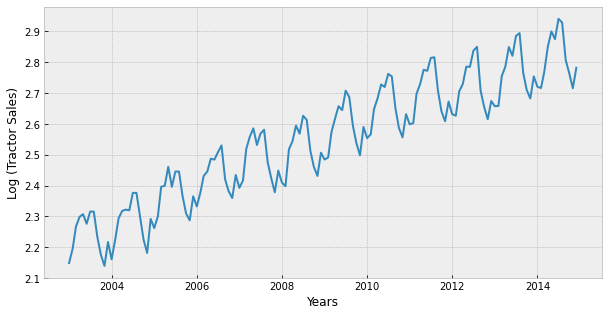

In [34]:
# Step 3: log transform data to make data stationary on variance
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

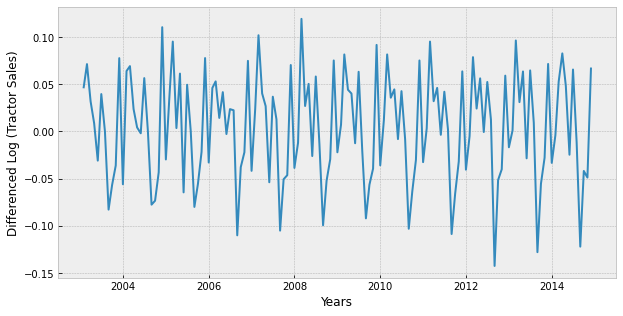

In [35]:



# Step 4: Difference log transform data to make data stationary on both mean and 
# variance 
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')



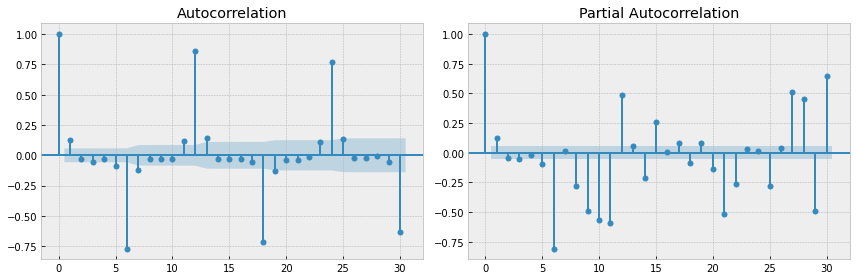

In [36]:
# Step 5: Plot ACF and PACF to identify potential AR and MA model


sales_ts_log = np.log10(sales_ts)
sales_ts_log.shape

sales_ts_log.dropna(inplace=True)
sales_ts_log.shape

sales_ts_log.head(5)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()


In [38]:
# Step 6: Identification of best fit ARIMA model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)

for i in p:
	print(i)


[i for i in p]


# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf

best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

range(0, 2)
0
1
Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-733.7720416799248


In [40]:
#AIC & BIC 
blog_param_order = (0, 1, 1)
blog_param_seasonal_order = (1, 0, 1, 12)
blog_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=blog_param_order,
                                      seasonal_order=blog_param_seasonal_order,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
blog_results = blog_model.fit()
print("Blog SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, blog_results.aic))


Blog SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-733.7720416799248


In [43]:
 #Step 7: Predict sales on in-sample date using the best fit ARIMA model
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
#print(best_results.summary().tables[0])
#print(best_results.summary().tables[1])

pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci .head()



,lower Tractor-Sales,upper Tractor-Sales
2012-01-01,2.614036,2.676174
2012-02-01,2.615924,2.689789
2012-03-01,2.700210,2.784180
2012-04-01,2.728827,2.821810
2012-05-01,2.767974,2.869171


In [45]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
sales_ts_forecasted .head()

2012-01-01    2.645105
2012-02-01    2.652857
2012-03-01    2.742195
2012-04-01    2.775318
2012-05-01    2.818573
Freq: MS, Name: predicted_mean, dtype: float64

In [47]:
sales_ts_truth = sales_ts_log['2012-01-01':]
sales_ts_truth.head() 

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
Freq: MS, Name: Tractor-Sales, dtype: float64

In [48]:
# Compute the mean square error
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
# The Mean Squared Error of our forecasts is 0.0011


The Mean Squared Error of our forecasts is 0.0011


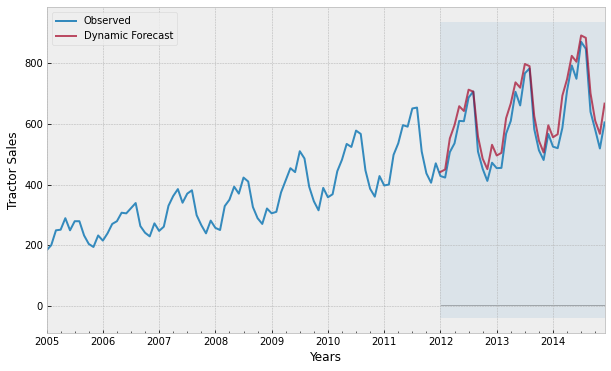

In [49]:
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [50]:
# Step 8: Forecast sales using the best fit ARIMA model
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI



In [51]:
# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()



,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.460435,528.283762,609.542388,528.283762,609.542388
2015-01-01,566.176292,520.019774,616.429623,520.019774,616.429623
2015-02-01,668.744837,607.122298,736.622026,607.122298,736.622026
2015-03-01,755.254246,678.582029,840.589571,678.582029,840.589571
2015-04-01,850.312179,756.799471,955.379634,756.799471,955.379634


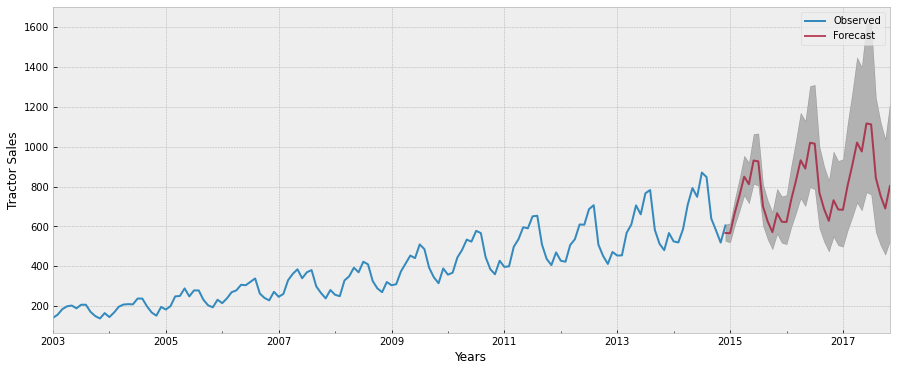

In [52]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

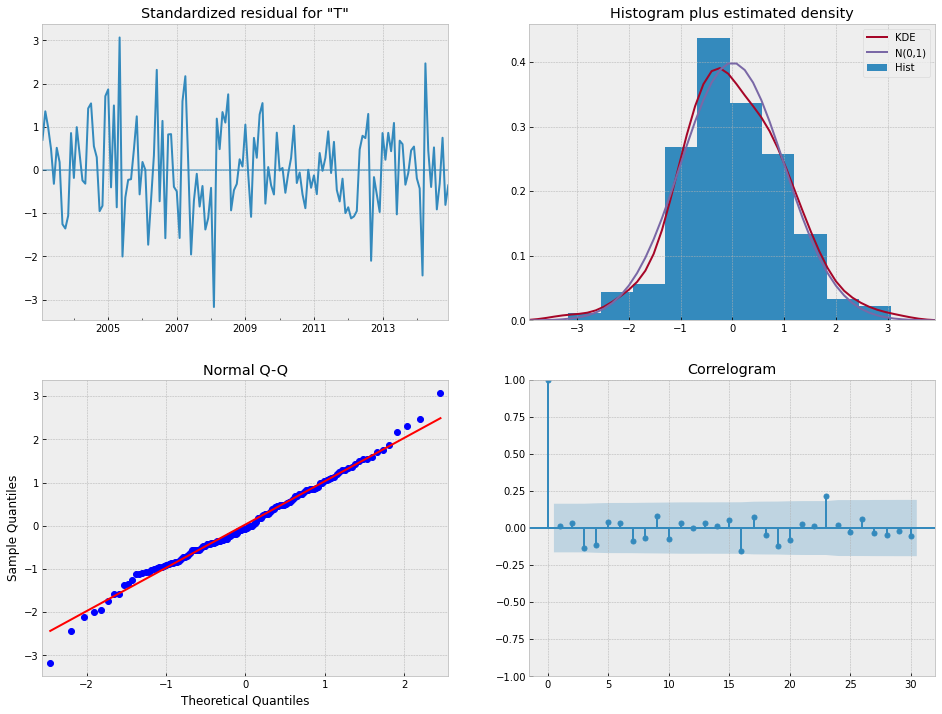

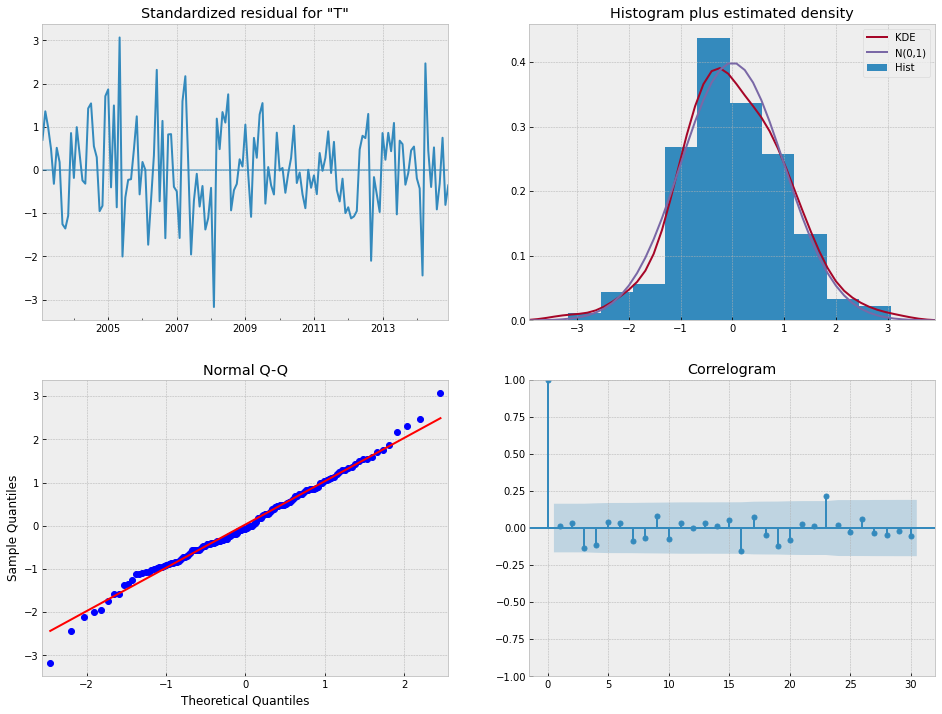

In [53]:
# Step 9: Plot ACF and PACF for residuals of ARIMA model to ensure no 
best_results.plot_diagnostics(lags=30, figsize=(16,12))



In [57]:

# Step 10: Regression with ARIMA Errors 
mkt_sales_data = pd.read_csv('sales-and-marketing.csv')
mkt_sales_data.head()

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [58]:
# since the complete date was not mentioned, assume that it was 
# the first of every month
mkt_sales_data.set_index(pd.date_range(start='2011-01-01', freq='MS', periods=len(mkt_sales_data)), inplace=True)
mkt_sales_data.head()



,Time Period,Sales,Marketing Expense
2011-01-01,Jan-11,397,486.64
2011-02-01,Feb-11,400,501.80
2011-03-01,Mar-11,498,437.09
2011-04-01,Apr-11,536,565.16
2011-05-01,May-11,596,744.15


In [59]:
mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.head()



,Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


In [60]:
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'}, inplace=True)
mkt_sales_data.head(5)



,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


Text(0, 0.5, 'Monthly Tractor Sales')

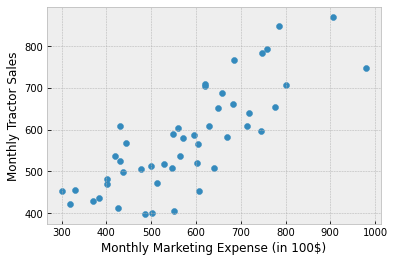

In [61]:
# plot the following scatter plot of same months marketing expense and 
# tractors sales.
plt.figure()
plt.scatter(x=mkt_sales_data['Marketing Expense'], y=mkt_sales_data['Tractor-Sales'])
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')



In [62]:
print("Correlation for Marketing Data: {}".format(round(mkt_sales_data.corr()['Marketing Expense']['Tractor-Sales'], 2)))
# The following is the correlation plot for stationary data:

Correlation for Marketing Data: 0.8


Correlation for Stationary Data: 0.41


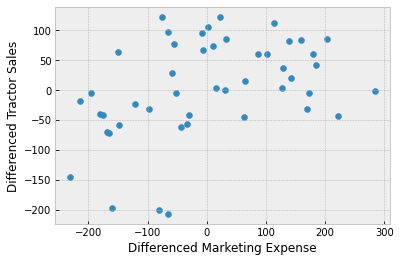

In [63]:
mkt_sales_data_diff = mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.head() 

mkt_sales_data_diff.dropna(inplace=True)
mkt_sales_data_diff.head()

plt.figure()
plt.scatter(x=mkt_sales_data_diff['Marketing Expense'], y=mkt_sales_data_diff['Tractor-Sales'])
plt.xlabel('Differenced Marketing Expense')
plt.ylabel('Differenced Tractor Sales')

print("Correlation for Stationary Data: {}".format(round(mkt_sales_data_diff.corr()['Marketing Expense']['Tractor-Sales'], 2)))





In [64]:
# near perfect correlation has now disappeared though there is still some 
# correlation in this data ( ρ  = 0.41).
# the marketing effort for the previous few months needs to have a 
# good correlation with sales for an effective marketing program. 
mkt_sales_data_diff.head()

print(len(mkt_sales_data_diff))

47


In [65]:
prev_months_corr_data = pd.DataFrame(np.column_stack((\
                                        mkt_sales_data_diff['Marketing Expense'][0:46].values,\
                                        mkt_sales_data_diff['Tractor-Sales'][1:47].values)), \
                                     columns=["Previous Month's Differenced Marketing Expense" , 
                                              "Differenced Tractor Sales"])

prev_months_corr_data.head()

,Previous Month's Differenced Marketing Expense,Differenced Tractor Sales
0,15.16,98.0
1,-64.71,38.0
2,128.07,60.0
3,178.99,-5.0
4,-195.41,60.0


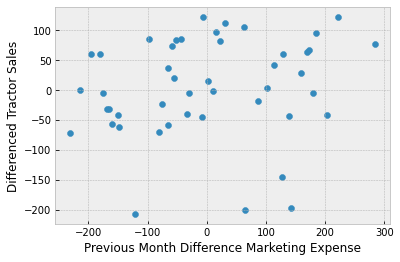

Correlation of current Months's Differenced Tractor Sales with Previous Month's Differenced Marketing Expense: 0.17


In [66]:
plt.figure()
plt.scatter(x=prev_months_corr_data["Previous Month's Differenced Marketing Expense"], \
            y=prev_months_corr_data["Differenced Tractor Sales"])
plt.xlabel("Previous Month Difference Marketing Expense")
plt.ylabel("Differenced Tractor Sales")
plt.show()
print("Correlation of current Months's Differenced Tractor Sales with Previous Month's Differenced Marketing Expense: {}"\
    .format(round(prev_months_corr_data.corr().iloc[0,1], 2)))

In [67]:
# The following diagram how the current data can be correlated 
# to the previous months data.
# Previous Months Correlation
# The correlation for the previous quarter also shows non-existent correlation 
# with sales. build a regression model with ARIMA error (ARIMAX) model for 
# the current and previous months.
clip_length = len(mkt_sales_data_diff)
clip_length

47

In [68]:
lagged_mkt_exp_diff_sales_data = pd.DataFrame(np.column_stack((\
                                        mkt_sales_data_diff['Marketing Expense'],\
                                        mkt_sales_data_diff['Marketing Expense'].shift(periods=1)[0:clip_length],\
                                        mkt_sales_data_diff['Marketing Expense'].shift(periods=2)[0:clip_length],\
                                        mkt_sales_data_diff['Marketing Expense'].shift(periods=3)[0:clip_length],\
                                        mkt_sales_data_diff['Tractor-Sales'][0:47].values)), \
                                     columns=["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1", "Diff_Mkt_Exp_Lag_2", "Diff_Mkt_Exp_Lag_3", "Diff_Sales"])
lagged_mkt_exp_diff_sales_data.head(5)

,Diff_Mkt_Exp,Diff_Mkt_Exp_Lag_1,Diff_Mkt_Exp_Lag_2,Diff_Mkt_Exp_Lag_3,Diff_Sales
0,15.16,NaN,NaN,NaN,3.0
1,-64.71,15.16,NaN,NaN,98.0
2,128.07,-64.71,15.16,NaN,38.0
3,178.99,128.07,-64.71,15.16,60.0
4,-195.41,178.99,128.07,-64.71,-5.0


In [69]:
lagged_mkt_exp_diff_sales_data.set_index(mkt_sales_data_diff.index, inplace=True)
lagged_mkt_exp_diff_sales_data.head(5)
# The marketing expense for the last month as displayed below has very 
# little correlation ( ρ  = 0.17):

,Diff_Mkt_Exp,Diff_Mkt_Exp_Lag_1,Diff_Mkt_Exp_Lag_2,Diff_Mkt_Exp_Lag_3,Diff_Sales
2011-02-01,15.16,NaN,NaN,NaN,3.0
2011-03-01,-64.71,15.16,NaN,NaN,98.0
2011-04-01,128.07,-64.71,15.16,NaN,38.0
2011-05-01,178.99,128.07,-64.71,15.16,60.0
2011-06-01,-195.41,178.99,128.07,-64.71,-5.0


In [ ]:
# We now want to create different by considering the different lagged marketing 
# expenditure attributes as regressors and investigate whether previous 
# motnh's/quarter's affect the tractor sales or not (in other words if we 
# incoporate the marketing efforts does they lower the AIC score or not.
# We would be building 4 ARIMA models with regressors ranging from current month
# to last quarter)
# Models With Regressors
import sys
def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=True,
                                                 enforce_invertibility=True)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])



In [ ]:
lagged_mkt_exp_diff_sales_data.head()

lagged_mkt_exp_diff_sales_data["Diff_Sales"].head()



In [ ]:
#ARIMA Model No Regressor
timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
timeseries.head()



In [ ]:
regressors = lagged_mkt_exp_diff_sales_data["Diff_Mkt_Exp"][3:47]
regressors.head()



In [ ]:
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))
# Best SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 model - AIC:443.2544478059975




In [ ]:
#ARIMA Model with 1 month Lag Marekting Sales Data Regressor
#timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data[["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1"]][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))
# Best SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 model - AIC:445.140053440143




In [ ]:
#ARIMA Model with 2 months Lag Marekting Sales Data Regressor
#timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data[["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1", "Diff_Mkt_Exp_Lag_2"]][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))
# Best SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 model - AIC:447.0778405052632 Statespace Model Results




In [ ]:
#ARIMA Model with 3 months Lag Marekting Sales Data Regressor
#timeseries = lagged_mkt_exp_diff_sales_data["Diff_Sales"][3:47]
regressors = lagged_mkt_exp_diff_sales_data[["Diff_Mkt_Exp", "Diff_Mkt_Exp_Lag_1", "Diff_Mkt_Exp_Lag_2", "Diff_Mkt_Exp_Lag_3"]][3:47]
auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 1), q=range(0, 2))
# Best SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 model - AIC:447.4032021513864 Statespace Model Results  


In [ ]:
'''# Compare the AIC from the various models:
Models	No Regressor	1 Month Lag Regressor	2 Months Lag Regressor	3 Months Lag Regressor
AIC			443.254				445.140				447.078					447.403

Notice AIC, AICc, and BIC values for the plain ARIMA model without marketing 
expense as predictor variable has lower values of the two models. 

This indicates that marketing expense is not actually adding value to tractor 
sales.

This is the first indication for the management at PH to re-evaluate 
the marketing and farmer connect program. 
'''
Python123